# Week 2: Uber case

by Markus Minkkinen

### Executive summary 




The question to analyzed was, how the increase in the waiting time in the express effects to the operations. The data was analyzed with multi-variable regression analysis with whole dataset, with division to the commute and non-commute and with taking only independent variables. 

Based on the analysis the number of express rides took with the uber reduces and also the cancellation rate increases. However, the pay which is have to pay to drivers is reduced which could suggest that there is opportunity to cut costs. However, the significance is not important. Also, the commute or non-commute time doesn't offer significant imporvement of number of express and 2/3+ passangers in the car even thought it increased the number of them.

To sum up, **Uber should not increase the waiting time from 2 min to 5 min**

### Setting up the data

In [36]:
import pandas as pd # Data frames (for storing data)
import numpy as np # Scientific computing
import statsmodels.api as sm # Linear regression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [37]:
# load data and basic view of it 

uber_data = pd.read_csv('uber.csv') # Storing the data into pandas DataFrame
uber_data.head(10).style # Add .style to show all columns (otherwise some columns will be hidden with "...")


,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches
0,Boston,2018-02-19 7.00,2 mins,False,True,1415,3245,256,34458.411630,3372,1476
1,Boston,2018-02-19 9.40,5 mins,True,False,1461,2363,203,29764.349820,2288,1275
2,Boston,2018-02-19 12.20,2 mins,False,False,1362,2184,118,27437.367360,2283,962
3,Boston,2018-02-19 15.00,5 mins,True,True,1984,3584,355,44995.452990,4035,2021
4,Boston,2018-02-19 17.40,2 mins,False,False,1371,2580,181,27583.955300,2200,979
5,Boston,2018-02-19 20.20,5 mins,True,False,1401,2022,135,23888.110850,2066,1062
6,Boston,2018-02-19 23.00,2 mins,False,False,1216,2543,103,29642.905670,2600,1406
7,Boston,2018-02-20 1.40,5 mins,True,False,1691,2018,150,25794.869920,1918,1281
8,Boston,2018-02-20 4.20,2 mins,False,False,1248,2481,131,23238.946290,2623,1059
9,Boston,2018-02-20 7.00,5 mins,True,True,1815,2539,284,34047.473900,2624,1565


In [38]:
uber_data.dtypes
df = uber_data.copy()
df.head()

,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches
0,Boston,2018-02-19 7.00,2 mins,False,True,1415,3245,256,34458.41163,3372,1476
1,Boston,2018-02-19 9.40,5 mins,True,False,1461,2363,203,29764.34982,2288,1275
2,Boston,2018-02-19 12.20,2 mins,False,False,1362,2184,118,27437.36736,2283,962
3,Boston,2018-02-19 15.00,5 mins,True,True,1984,3584,355,44995.45299,4035,2021
4,Boston,2018-02-19 17.40,2 mins,False,False,1371,2580,181,27583.95530,2200,979


In [39]:
df.drop(columns=['city_id', 'period_start', 'wait_time'], inplace=True)
df.head().style

,treat,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches
0,False,True,1415,3245,256,34458.411630,3372,1476
1,True,False,1461,2363,203,29764.349820,2288,1275
2,False,False,1362,2184,118,27437.367360,2283,962
3,True,True,1984,3584,355,44995.452990,4035,2021
4,False,False,1371,2580,181,27583.955300,2200,979


### 1. 

Hypotheses: Generate a set of hypotheses about the possible consequences of longer wait times to guide Uber’s decision making concerning the Express product. Explain what pattern(s) of hypothesis testing results would support the decision to increase wait time to from two to five minutes? When generating hypotheses, you do not need to be limited to the available datainplace

In [40]:
# common statistical indicators of the data 
uber_data.describe()

,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,1408.007937,2515.523810,177.738095,28237.220655,2535.753968,1322.444444
std,257.929122,497.693588,51.631801,5450.953954,607.572530,350.324913
min,771.000000,1638.000000,95.000000,18769.992990,1588.000000,728.000000
25%,1248.250000,2225.000000,147.750000,24721.888253,2171.750000,1059.750000
50%,1397.000000,2427.500000,166.000000,27352.840575,2361.000000,1282.500000
75%,1580.250000,2661.750000,187.250000,30586.107525,2714.500000,1481.750000
max,2241.000000,4507.000000,355.000000,48600.421960,5005.000000,2739.000000


In [41]:
filtered_data_5 = uber_data[uber_data['treat'] == True]
filtered_data_5.describe()

,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1460.698413,2419.380952,190.126984,27183.202389,2438.301587,1357.730159
std,271.156343,462.190906,53.825133,5043.154791,576.111258,324.710402
min,829.000000,1638.000000,125.000000,18769.992990,1588.000000,728.000000
25%,1298.000000,2085.500000,156.500000,23937.146420,2105.000000,1137.000000
50%,1435.000000,2361.000000,173.000000,26017.526020,2299.000000,1322.000000
75%,1632.500000,2536.500000,195.000000,28995.230530,2552.500000,1485.000000
max,2241.000000,3946.000000,355.000000,44995.452990,4203.000000,2739.000000


In [42]:
filtered_data_2 = uber_data[uber_data['treat'] == False]
filtered_data_2.describe()

,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches
count,63.00000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1355.31746,2611.666667,165.349206,29291.238921,2633.206349,1287.158730
std,234.43548,516.708285,46.536201,5675.727427,626.927612,373.453335
min,771.00000,1845.000000,95.000000,22153.188780,1885.000000,735.000000
25%,1201.50000,2264.500000,132.500000,25105.857070,2206.500000,1026.500000
50%,1362.00000,2496.000000,160.000000,28041.728440,2541.000000,1211.000000
75%,1486.00000,2757.500000,178.500000,31438.036595,2737.500000,1478.000000
max,1957.00000,4507.000000,350.000000,48600.421960,5005.000000,2533.000000


In [43]:
uber_data.groupby("treat").aggregate({
    'trips_pool' : ['mean'],
    'trips_express' : ['mean'],
    'rider_cancellations' : ['mean'],
    'total_driver_payout' : ['mean'],
    'total_matches' : ['mean'],
    'total_double_matches' : ['mean']
})

,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches
,mean,mean,mean,mean,mean,mean
treat,,,,,,
False,1355.317460,2611.666667,165.349206,29291.238921,2633.206349,1287.158730
True,1460.698413,2419.380952,190.126984,27183.202389,2438.301587,1357.730159


In [44]:
uber_data.groupby(["commute",'treat']).aggregate({
    'trips_pool' : ['mean'],
    'trips_express' : ['mean'],
    'rider_cancellations' : ['mean'],
    'total_driver_payout' : ['mean'],
    'total_matches' : ['mean'],
    'total_double_matches' : ['mean']
})

trips_pool trips_express rider_cancellations  \
                      mean          mean                mean   
commute treat                                                  
False   False  1324.528302   2438.867925          149.962264   
        True   1445.754717   2275.075472          168.792453   
True    False  1518.500000   3527.500000          246.900000   
        True   1539.900000   3184.200000          303.200000   

              total_driver_payout total_matches total_double_matches  
                             mean          mean                 mean  
commute treat                                                         
False   False        27360.449546   2415.075472          1191.471698  
        True         25567.914480   2242.811321          1272.811321  
True    False        39524.422611   3789.300000          1794.300000  
        True         35744.228310   3474.400000          1807.800000

In [45]:
uber_data.groupby(["commute"]).aggregate({
    'trips_pool' : ['mean'],
    'trips_express' : ['mean'],
    'rider_cancellations' : ['mean'],
    'total_driver_payout' : ['mean'],
    'total_matches' : ['mean'],
    'total_double_matches' : ['mean']})

,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches
,mean,mean,mean,mean,mean,mean
commute,,,,,,
False,1385.141509,2356.971698,159.377358,26464.182013,2328.943396,1232.141509
True,1529.200000,3355.850000,275.050000,37634.325461,3631.850000,1801.050000


### Hypothesis:


Based on the case text, the following hyphotesis are formulated to investigate how the 


1. There is more users
- more time to get users to pool
2. More customer cancellations
- people change to competitor products when it takes long time to get ride
3. Reduced driver payout (more profit)
- more efficient use of the car
4. more matches in the pool mechanisim
- more time to get the ride
5. more double matches in the pool mechanisim
- more time to get the ride

Effects of time:


6. Commuting time follows the 2 / 5 min forumla introduced above
7. More 2+ or 3+ rides during commute time
- more time to get the ride 





#### Factors that support the decison to increase the time from 2 min to 5 min (2->5min)

1. The number of express trips doesn't decrease, but either stays the same or increaes
2. Commuting has it's own effect, i. e. there is positive effects either on non-commute time or in commute time which would indicate that the increse of the time would be sufficient in the spcific time frame
3. There is more savings of the money if used 

### 2. 

Analysis and interpretation: Analyze the available data from the switchback experiment in Boston. What are the most important consequences of longer wait times?

Let's do correlation and coefficienct analysis regards to the addint the 2 or 5 mins (treat). If coeficient is positive, it means that the increase in time leads to higher result in the selected column and vice versa if negative. In addition, if p value is p < 0.05 then the result is statistically significant. R^2 tells us how does the increase (2->5min) have in the change of the data. 

In [46]:

df['trip_sum'] = df['trips_pool'] + df['trips_express'] + df['total_matches'] + df['total_double_matches']
# jakaumuat 3 ja 4 hypoteesit 
df.head()

,treat,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches,trip_sum
0,False,True,1415,3245,256,34458.41163,3372,1476,9508
1,True,False,1461,2363,203,29764.34982,2288,1275,7387
2,False,False,1362,2184,118,27437.36736,2283,962,6791
3,True,True,1984,3584,355,44995.45299,4035,2021,11624
4,False,False,1371,2580,181,27583.95530,2200,979,7130


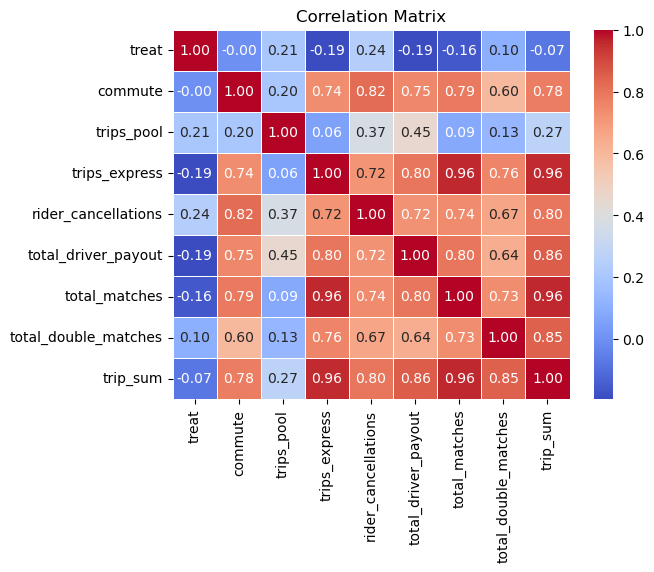

In [47]:
dff = df.copy()
dff['commute'] = dff['commute'].values.astype(int)
df['treat'] = df['treat'].values.astype(int)
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


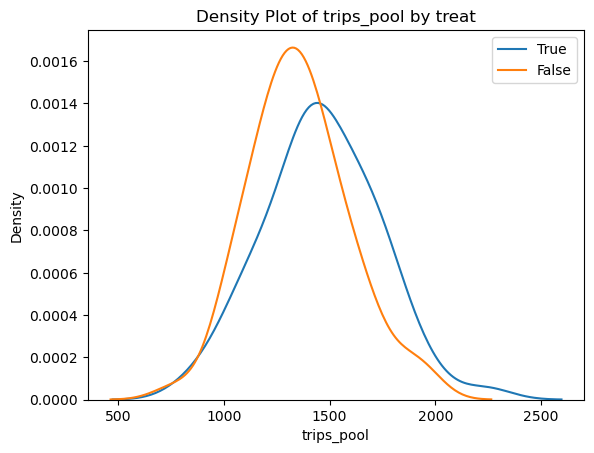

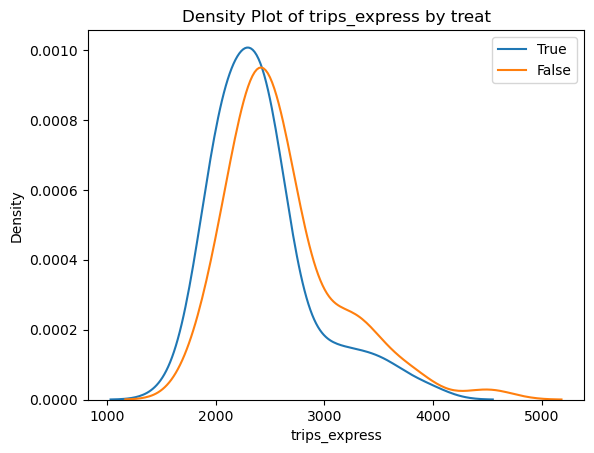

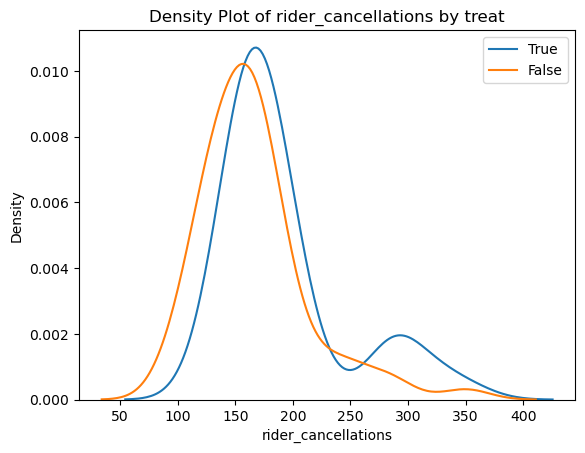

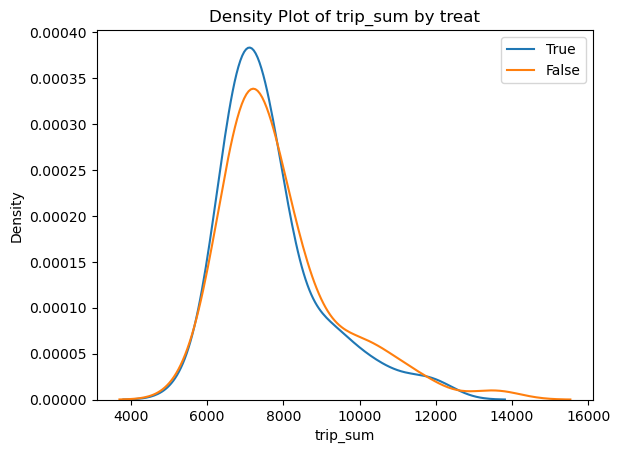

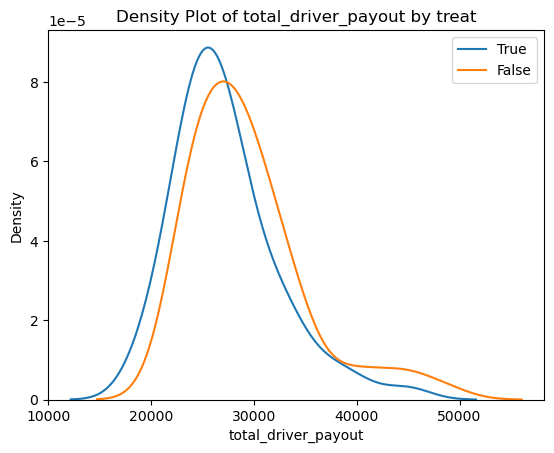

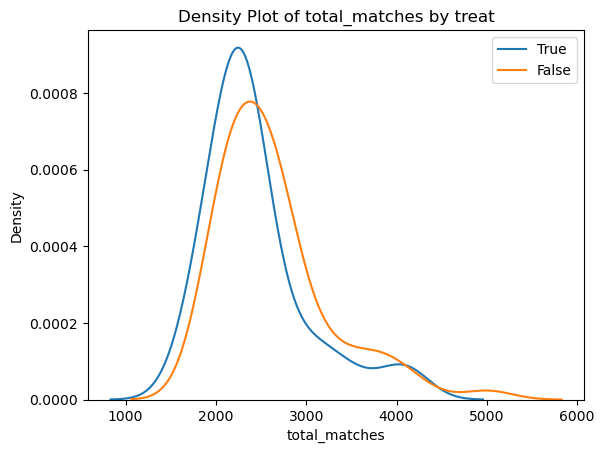

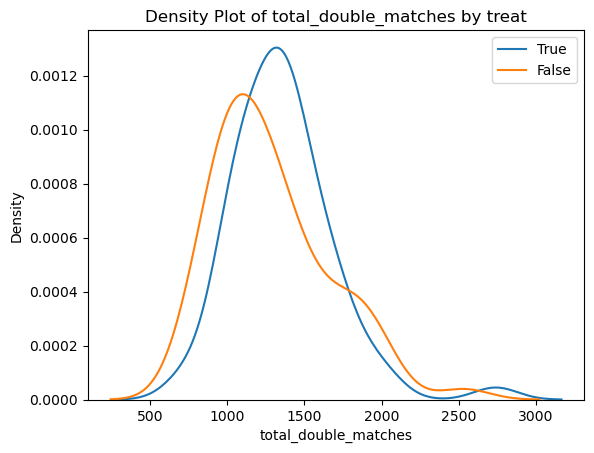

In [48]:
selVars = ['trips_pool',
 'trips_express',
'rider_cancellations'
           ,'trip_sum', 'total_driver_payout', 'total_matches', 'total_double_matches'
]
boolean_column = 'treat'

for var in selVars:
        
        # Create density plot for True values
    sns.kdeplot(data=df[df[boolean_column] == True][var],  label='True')
        
    # Create density plot for False values
    sns.kdeplot(data=df[df[boolean_column] == False][var],  label='False')
        
        # Add title and labels
    plt.title(f'Density Plot of {var} by {boolean_column}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend()
        
        # Show plot
    plt.show()

#### We notice that 

1. there is less pool trips
2. there is less express trips 
3. there is more rider cancellations 
4. there is no effect of more users cancelling the ride, meaning there is more multiple person pooled riders with longer waiting time
5. The costs are reduced due to less pay to driver 
6. There is significantly more double matches (3+ person in a car)

#### Next we validate these claims

In [49]:
selVars = ['trips_pool',
 'trips_express',
 'rider_cancellations',
 'total_driver_payout',
 'total_matches',
 'total_double_matches', 'commute']


y = df['treat'].values.astype(int) # Define target variable 
#print(y)
#numerical values might need to be converted above or bellow average? 
df['commute'] = df['commute'].values.astype(int)


X = df[selVars] # Define independent variable and convert boolean to 0/1
#print(X)
#X = StandardScaler().fit_transform(X)

### We could scale the data to with standardScaler but the relusts will be the same 
###


X = sm.add_constant(X) # Define intercept
#print(X)

# Fit the Ordinary least Squares linear regression 
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     16.57
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           4.51e-15
Time:                        22:42:35   Log-Likelihood:                -48.327
No. Observations:                 126   AIC:                             112.7
Df Residuals:                     118   BIC:                             135.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8505 

In [50]:
selVars = ['trip_sum']


y = df['treat'].values.astype(int) # Define target variable 
#print(y)
#numerical values might need to be converted above or bellow average? 
df['commute'] = df['commute'].values.astype(int)


X = df[selVars] # Define independent variable and convert boolean to 0/1
#print(X)
#X = StandardScaler().fit_transform(X)

### We could scale the data to with standardScaler but the relusts will be the same 
###


X = sm.add_constant(X) # Define intercept
#print(X)

# Fit the Ordinary least Squares linear regression 
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6905
Date:                Wed, 06 Mar 2024   Prob (F-statistic):              0.408
Time:                        22:42:35   Log-Likelihood:                -91.100
No. Observations:                 126   AIC:                             186.2
Df Residuals:                     124   BIC:                             191.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7040      0.250      2.821      0.0

Results are

Hypothesis : Result

1. There is more users : FALSE, no statistical significance 
2. More customer cancellations : TRUE 
3. Reduced driver payout (more profit) : TRUE
4. more matches in the pool mechanisim : FALSE, no statistical significance
5. more double matches in the pool mechanisim: TRUE 


R-squared value
THere is 0.496 r^2 value which indicates that almost 50 % of variation in data is explained from the increase in the trip time. However, r^2 is bad and doesn't explain the data well. 

### How the commute effect the values?

Let's divide the data into two segment, when there is commute time and when there is not commute time. After that let's test the same setup as above. 

In [51]:
selVars2 = ['trips_pool',
 'trips_express',
 'rider_cancellations',
 'total_driver_payout',
 'total_matches',
 'total_double_matches']

outcome = 'treat'


for name, group in df.groupby('commute'):
    X = group[selVars2]
    y = group[outcome]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    print(f"Regression Results for Group: {name}")
    print(model.summary())
    print("\n")

Regression Results for Group: 0
                            OLS Regression Results                            
Dep. Variable:                  treat   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     13.20
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           6.24e-11
Time:                        22:42:35   Log-Likelihood:                -45.780
No. Observations:                 106   AIC:                             105.6
Df Residuals:                      99   BIC:                             124.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------


In [52]:
### laske myös prosentit tähän 

### tee density kaaviot 

##### Outside commuting time



1. There is more users: FALSE
2. More customer cancellations : TRUE 
3. Reduced driver payout (more profit) : TRUE 
4. more matches in the pool mechanisim : False, no statistical significance
5. more double matches in the pool mechanisim : TRUE 

The r^2 value is 0.44 which means that the new feature (2->5min) explains quite well the result. 

Decreased costs on average: 2.38 from mean of 37,634. So it is very small saving. 
Increase in the pooled trips: 0.72, which is again very small increase. 



##### During commuting time

1. There is more users : False
2. More customer cancellations : TRUE
3. Reduced driver payout (more profit) : TRUE 
4. more matches in the pool mechanisim : FALSE, no significance
5. more double matches in the pool mechanisim : False: no signicidance 


The r^2 is 0.823 which means that the (2->5) new feature contributes significantly to the explaining the result. However, the number of observations is low which makes the test less relaiable.





To sum up, the current testing indicates that there is increase in the double pooled use outisde the commuting time and increase in customer cancellations. However, there is decreae in driver costs. The same effect is on during commuting hours, increase in the cancellations and reduce in the payout. The effects are small and doesn't really indicate that there should be change in the algorithm even though there is more cars matched.


#### Model adjusted to the correlations between the parameters 

Let's finally check how the uncorrelated parameters behave.

It seems that:

Commute is highly correlated with express trips, ride cancellations, total driver payout and total matches

Express trips are higly correlated with (commute), ride cancellations, total driver payout, total matches and total double matches. 
- This also confirms the logical concequense which is that the express trips cause the matches and double matches.


Pool trips is not very higly correlated with other variables 


->

Based on the correlations, we could focus on the to the variables which doesn't have high correlatin with each other. 

In [53]:
selVars = [
 'trips_pool',
 'trips_express'
]


y = df['treat'].values.astype(int) # Define target variable 
#print(y)
#numerical values might need to be converted above or bellow average? 
df['commute'] = df['commute'].values.astype(int)


X = df[selVars] # Define independent variable and convert boolean to 0/1
#print(X)
#X = StandardScaler().fit_transform(X)

### We could scale the data to with standardScaler but the relusts will be the same 
###


X = sm.add_constant(X) # Define intercept
#print(X)

# Fit the Ordinary least Squares linear regression 
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     5.680
Date:                Wed, 06 Mar 2024   Prob (F-statistic):            0.00437
Time:                        22:42:36   Log-Likelihood:                -85.884
No. Observations:                 126   AIC:                             177.8
Df Residuals:                     123   BIC:                             186.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4292      0.316      1.357

With correlation taken into account in the parameters selection, the number of trips seems to increase and the trips with express seems to decrease with the statistical importance. However, the r^2 value is not high (0.085) so the 2->5min change doesn't describe the variability very well.

In [54]:
selVars2 = ['trips_pool',
 'trips_express']

outcome = 'treat'


for name, group in df.groupby('commute'):
    X = group[selVars2]
    y = group[outcome]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    print(f"Regression Results for Group: {name}")
    print(model.summary())
    print("\n")

Regression Results for Group: 0
                            OLS Regression Results                            
Dep. Variable:                  treat   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     6.771
Date:                Wed, 06 Mar 2024   Prob (F-statistic):            0.00173
Time:                        22:42:37   Log-Likelihood:                -70.387
No. Observations:                 106   AIC:                             146.8
Df Residuals:                     103   BIC:                             154.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         

It seems that the only the non commute time test gives statistically significant results. 
In non-commute:
1. The pool trips increase 
2. express trips decrease 

### 3. 
Decision making: Should Uber increase wait times in the cities where Express is currently offered? If so, when?

Based on the analysis, the new feature doesn't effect the positively to the business of the Uber. This means Uber shoudn't increase the waiting times where the express is offered. 



Analysis of hypothesis

1. There is more users: False
2. More customer cancellations : true during commute and outside the commute hours
3. Reduced driver payout (more profit) : true during and outside commute hours 
4. more matches in the pool mechanisim : no significance with commute hours
5. more double matches in the pool mechanisim : more pooling 

The savings generated from the using the driver resources are quite marginal which is not significant enought to justify the change. Neither is the increase of the use of double matches (3+ persons) large which could outset the negative effect of the customer cancellations. Also the number of the trips in POOL and EXPRESS reduced slightly which doesn't support the change.  